# Benchmarking

In [1]:
import sys
import time
import os
import pandas as pd
import numpy as np
from functools import partial
# sys.path.append('/Users/calum/Developer/pyzx-heuristics-master')
# import pyzx as zx_heuristics
sys.path.append('..')
import pyzx as zx
from benchmarking import benchmark

In [3]:
# b = benchmark(dirpath='benchmark')
b = benchmark()
b.load_circuits(os.path.join('..', 'circuits', 'benchmarking', 'Fast', 'before'), group_name='fast')
b.load_circuits(os.path.join('..', 'circuits', 'benchmarking', 'Fast', 'nrscm'), group_name='fast', simp_strategy='NRSCM')
b.show_attributes()

Circuit attributes:  ['Qubits', 'Gates', '2Q Count', 'T Count', 't_simp', 't_opt']
Loaded functions:  ['Basic', 'cFlow', 'gFlow', 'Heur', 'Int_Clifford', 'Full_Reduce', 'cFlow_1', 'cFlow_2', 'cFlow_3', 'cFlow_4', 'cFlow_5', 'cFlow_6', 'cFlow_7', 'cFlow_8', 'cFlow_9', 'cFlow_10', 'cFlow_11', 'cFlow_12', 'gFlow_1', 'int_cliff2', 'int_cliff2_flow', 'int_cliff2_flow_2', 'int_cliff2_2']
Loaded routines:  ['NRSCM']
Loaded circuit groups:  ['fast', 'generated']


,Original,Basic,Full_Reduce,Heur,Int_Clifford,NRSCM,cFlow,cFlow_1,cFlow_10,cFlow_11,cFlow_12,cFlow_2,cFlow_3,cFlow_4,cFlow_5,cFlow_6,cFlow_7,cFlow_8,cFlow_9,gFlow,gFlow_1,int_cliff2,int_cliff2_2,int_cliff2_flow,int_cliff2_flow_2
fast,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,-,Y,-
generated,Y,Y,Y,Y,Y,-,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,-,Y,Y,Y,Y


In [4]:

def basic(c):
    c1 = zx.optimize.basic_optimization(c.copy(), do_swaps=False).to_basic_gates()
    c2 = zx.optimize.basic_optimization(c.copy(), do_swaps=True).to_basic_gates()
    if c2.twoqubitcount() < c1.twoqubitcount(): return c2
    return c1

def full_reduce(c):
    g = c.to_graph()
    zx.simplify.full_reduce(g,quiet=True)
    c2 = zx.extract_circuit(g,up_to_perm=True).to_basic_gates()
    c3 = zx.optimize.basic_optimization(c2.copy(), do_swaps=False).to_basic_gates()
    c4 = zx.optimize.basic_optimization(c2.copy(), do_swaps=True).to_basic_gates()
    if c4.twoqubitcount() < c3.twoqubitcount(): return c4
    return c3

def int_cliff(c):
    g = c.to_graph()
    zx.simplify.to_gh(g)
    g2 = zx.simplify.flow_reduce_3(g,x=None, quiet=True)
    c2 = zx.extract.extract_circuit(g2, up_to_perm=True).to_basic_gates()
    c3 = zx.optimize.basic_optimization(c2.copy(), do_swaps=False).to_basic_gates()
    c4 = zx.optimize.basic_optimization(c2.copy(), do_swaps=True).to_basic_gates()
    if c4.twoqubitcount() < c3.twoqubitcount(): return c4
    return c3

def int_cliff_lim(c):
    g = c.to_graph()
    zx.simplify.to_gh(g)
    g2 = zx.simplify.flow_reduce_2(g,x=None, flow='g',quiet=True)
    c2 = zx.extract.extract_circuit(g2, up_to_perm=True).to_basic_gates()
    c3 = zx.optimize.basic_optimization(c2.copy(), do_swaps=False).to_basic_gates()
    c4 = zx.optimize.basic_optimization(c2.copy(), do_swaps=True).to_basic_gates()
    if c4.twoqubitcount() < c3.twoqubitcount(): return c4
    return c3

def int_cliff_lim_flow(c):
    g = c.to_graph()
    zx.simplify.to_gh(g)
    g2 = zx.simplify.flow_reduce_2(g,x=None, flow='causal',quiet=True)
    c2 = zx.extract.extract_simple(g2, up_to_perm=True).to_basic_gates()
    c3 = zx.optimize.basic_optimization(c2.copy(), do_swaps=False).to_basic_gates()
    c4 = zx.optimize.basic_optimization(c2.copy(), do_swaps=True).to_basic_gates()
    if c4.twoqubitcount() < c3.twoqubitcount(): return c4
    return c3

def nu_flow(c):
    g = c.to_graph()
    zx.simplify.to_gh(g)
    g2 = zx.simplify.flow_reduce(g,x=None, flow='causal',quiet=True)
    c2 = zx.extract.extract_simple(g2, up_to_perm=True).to_basic_gates()
    c3 = zx.optimize.basic_optimization(c2.copy(), do_swaps=False).to_basic_gates()
    c4 = zx.optimize.basic_optimization(c2.copy(), do_swaps=True).to_basic_gates()
    if c4.twoqubitcount() < c3.twoqubitcount(): return c4
    return c3

def nu(c):
    g = c.to_graph()
    zx.simplify.to_gh(g)
    g2 = zx.simplify.flow_reduce(g,x=None, flow='g',quiet=True)
    c2 = zx.extract.extract_circuit(g2, up_to_perm=True).to_basic_gates()
    c3 = zx.optimize.basic_optimization(c2.copy(), do_swaps=False).to_basic_gates()
    c4 = zx.optimize.basic_optimization(c2.copy(), do_swaps=True).to_basic_gates()
    if c4.twoqubitcount() < c3.twoqubitcount(): return c4
    return c3

In [ ]:
b.add_simplification_func(basic, 'Basic', groups_to_run=[],verify=False)
b.add_simplification_func(full_reduce, 'full_reduce', groups_to_run=[],verify=False)
b.add_simplification_func(int_cliff, 'int_cliff', groups_to_run=[],verify=False)
b.add_simplification_func(int_cliff_lim, 'int_cliff_lim', groups_to_run=[],verify=False)
b.add_simplification_func(int_cliff_lim_flow, 'int_cliff_lim_flow', groups_to_run=[],verify=False)
b.add_simplification_func(nu_flow, 'nu_flow', groups_to_run=[],verify=False)
b.add_simplification_func(nu, 'nu', groups_to_run=[],verify=False)

In [10]:
b.add_simplification_func(basic, 'Basic', groups_to_run=['fast'],verify=False)
b.add_simplification_func(full_reduce, 'full_reduce', groups_to_run=['fast'],verify=False)
b.add_simplification_func(int_cliff, 'int_cliff', groups_to_run=['fast'],verify=False)
b.add_simplification_func(int_cliff_lim, 'int_cliff_lim', groups_to_run=['fast'],verify=False)
b.add_simplification_func(int_cliff_lim_flow, 'int_cliff_lim_flow', groups_to_run=['fast'],verify=False)
b.add_simplification_func(nu_flow, 'nu_flow', groups_to_run=['fast'],verify=False)
b.add_simplification_func(nu, 'nu', groups_to_run=['fast'],verify=False)


Processing gFlow_1 on csum_mux_9_corrected                            :   4%|▍         | 2/52 [58:16<24:16:52, 1748.26s/it]


KeyboardInterrupt: 

In [9]:
b.show_attributes()

Circuit attributes:  ['Qubits', 'Gates', '2Q Count', 'T Count', 't_simp', 't_opt']
Loaded functions:  ['Basic', 'cFlow', 'gFlow', 'Heur', 'Int_Clifford', 'Full_Reduce', 'cFlow_1', 'cFlow_2', 'cFlow_3', 'cFlow_4', 'cFlow_5', 'cFlow_6', 'cFlow_7', 'cFlow_8', 'cFlow_9', 'cFlow_10', 'cFlow_11', 'cFlow_12', 'gFlow_1']
Loaded routines:  ['NRSCM']
Loaded circuit groups:  ['fast', 'generated']


,Original,Basic,Full_Reduce,Heur,Int_Clifford,NRSCM,cFlow,cFlow_1,cFlow_10,cFlow_11,cFlow_12,cFlow_2,cFlow_3,cFlow_4,cFlow_5,cFlow_6,cFlow_7,cFlow_8,cFlow_9,gFlow,gFlow_1
fast,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y
generated,Y,Y,Y,Y,Y,-,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,-


In [12]:
df = b.df(groups=['fast'],
     routines='all',
     funcs='all',
     atts=['Qubits', '2Q Count','T Count'])

  0%|          | 0/11 [00:00<?, ?it/s]

100%|██████████| 11/11 [00:00<00:00, 16.74it/s]


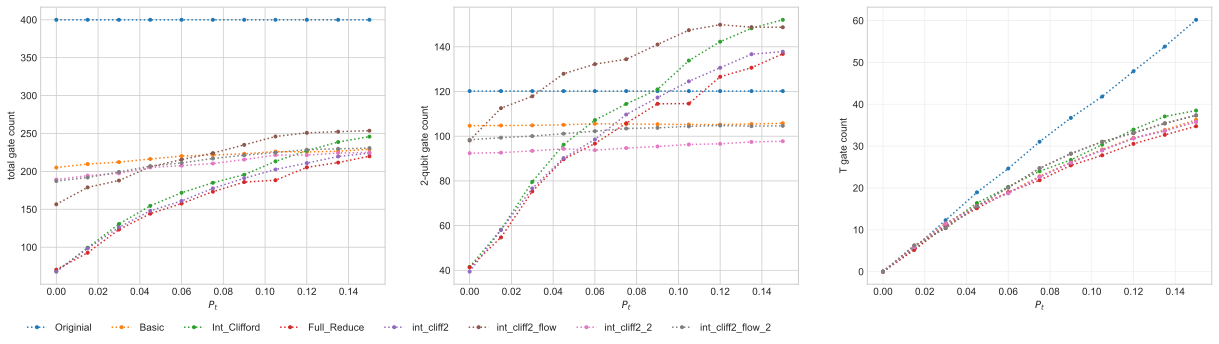

In [11]:
funcs = [''Basic', 'Int_Clifford', 'Full_Reduce', 'int_cliff2', 'int_cliff2_flow','int_cliff2_2', 'int_cliff2_flow_2'']
t_probs = [0.015*i for i in range(11)]
fig = b.Pt_graphs(funcs=funcs, qubits=8, depth=400, cnot_prob=0.3, t_probs=t_probs, ys=['Gates','2Q Count','T Count'], reps=20, overwrite=False, random_seed=42)

In [13]:
b.save(dirpath='benchmark')